In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [3]:

# Cargar el dataset (descargarlo desde Kaggle si no lo tienes)
url = 'C:/Users/Diego/Desktop/ML/data/train/diabetes.csv'

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Configuración para mostrar todo el contenido de las columnas
pd.set_option('display.max_colwidth', None)

# Configuración para mostrar todas las filas (si es necesario)
pd.set_option('display.max_rows', None)

df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Identificar columnas categóricas y numéricas
categoricas = df.select_dtypes(include=['object', 'category'])
numericas = df.select_dtypes(include=['int64', 'float64'])

print("Columnas categóricas:", categoricas.columns)
print("Columnas numéricas:", numericas.columns)

df = df.drop(columns=categoricas.columns)


Columnas categóricas: Index([], dtype='object')
Columnas numéricas: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


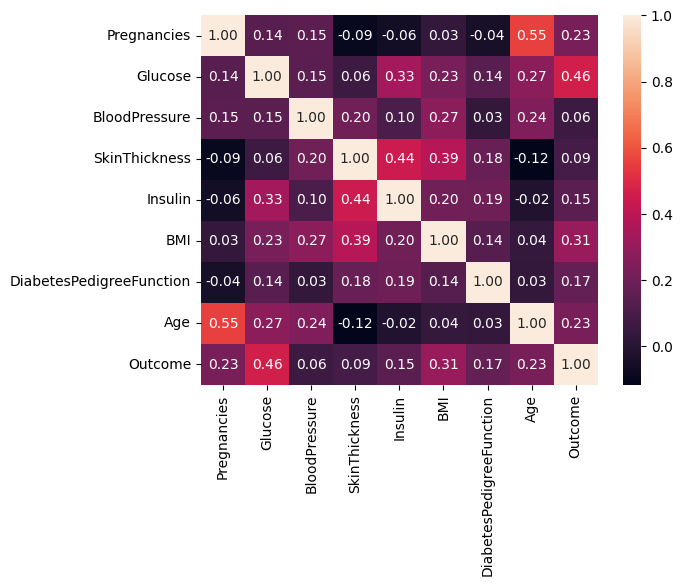

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()


In [7]:
# Crear una máscara para filtrar columnas con correlación absoluta mayor que 0.5
threshold = 0.5
mask = (corr.abs() < threshold)

# Obtener las columnas que cumplen con la condición
columns_to_keep = mask.columns[mask.any()]

# Crear una nueva matriz de correlación con las columnas filtradas
new_corr = corr.loc[columns_to_keep, columns_to_keep]

# Mostrar la nueva matriz de correlación
print("\nNueva matriz de correlación (solo columnas con |correlación| > 0.5):")
print(new_corr)


Nueva matriz de correlación (solo columnas con |correlación| > 0.5):
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.138740       0.150592      -0.092305   
Glucose                      0.138740  1.000000       0.148245       0.059696   
BloodPressure                0.150592  0.148245       1.000000       0.203837   
SkinThickness               -0.092305  0.059696       0.203837       1.000000   
Insulin                     -0.063651  0.333574       0.103538       0.442016   
BMI                          0.033177  0.225635       0.272929       0.389157   
DiabetesPedigreeFunction    -0.043875  0.138666       0.033872       0.181061   
Age                          0.551901  0.273096       0.241082      -0.116615   
Outcome                      0.227883  0.459373       0.060275       0.086219   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.063651  0.033177 

In [9]:
# Obtener las correlaciones absolutas con la columna 'Survived', excluyendo 'Survived' mismo
survived_corr_abs = corr['Outcome'].drop('Outcome').abs()

# Calcular el promedio de las correlaciones absolutas con 'Survived'
mean_corr_abs = survived_corr_abs.mean()

# Filtrar las características que tienen una correlación absoluta mayor que el promedio
features_above_average_abs = survived_corr_abs[survived_corr_abs > mean_corr_abs]

# Mostrar las características con correlaciones absolutas mayores que el promedio
print("\nCaracterísticas con correlación absoluta con 'Survived' mayor que el promedio (excluyendo 'Survived'):")
print(features_above_average_abs)


Características con correlación absoluta con 'Survived' mayor que el promedio (excluyendo 'Survived'):
Pregnancies    0.227883
Glucose        0.459373
BMI            0.308916
Age            0.226507
Name: Outcome, dtype: float64


In [11]:
# Análisis de importancia (Ejemplo con Random Forest)
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Outcome', axis=1)  # Cambia esto según tu variable objetivo
y = df['Outcome']

model = RandomForestClassifier()
model.fit(X, y)

# Importancia de características
importancia = model.feature_importances_
features = X.columns
feature_importance = pd.Series(importancia, index=features).sort_values(ascending=False)

print(feature_importance)

Glucose                     0.239567
BMI                         0.172816
Age                         0.133916
DiabetesPedigreeFunction    0.124937
BloodPressure               0.092777
Pregnancies                 0.088035
Insulin                     0.077248
SkinThickness               0.070704
dtype: float64


In [12]:
# Calcular el promedio de las importancias
mean_importance = feature_importance.mean()

# Filtrar las características que tienen una importancia mayor que el promedio
important_features = feature_importance[feature_importance > mean_importance]

# Mostrar las características importantes
print("Características con importancia mayor que el promedio:")
print(important_features)

Características con importancia mayor que el promedio:
Glucose    0.239567
BMI        0.172816
Age        0.133916
dtype: float64


In [14]:
# Crear un DataFrame con las características
features_above_average_df = features_above_average_abs.index.to_frame(name='Feature')
important_features_df = important_features.index.to_frame(name='Feature')

# Combinar las dos DataFrames
combined_features_df = pd.concat([features_above_average_df, important_features_df])

# Eliminar duplicados
unique_features_df = combined_features_df.drop_duplicates()

# Guardar el resultado en un archivo CSV
unique_features_df.to_csv('C:/Users/Diego/Desktop/ML/features/diabetes/important_features.csv', index=False)